# Peterside Hospital - Heart Disease Case Study by Chidimma Idika

>I will begin by importing necessary libraries for this project

In [90]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# !pip install xgboost
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv(r'C:\Users\Mumsie\Downloads\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Features in the dataset and meaning:

- age      = age in years
- sex      = (1 = male; 0 = female)
- cp       = chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- trestbps = resting blood pressure (in mmHg on admission to the hospital)
- chol     = serum cholesterol in mg/dl
- fbs      = (fasting blood sugar > 120mg/dl) (1 = true; 0 = false)
- restecg  = resting electrocardiographic results
- thalach  = maximum heart rate achieved
- exang    = exercise induced angina (1 = yes; 0 = no)
- oldpeak  = ST depression induced by exercise relative to rest
- slope    = the slope of the peak exercise ST segment 
- ca       = number of major vessels (0-3) colored by fluoroscopy 
- thal     = (3 = normal; 6 = fixed defect; 7 = reversible defect)
- target  = have disease or not (1 = yes; 0 = no).

For Better understanding and flow of analysis, I will rename some of the columns

In [92]:
df.columns = ['age', 'sex', 'chest_pain_type', 'rest_blood_pres', 'chol', 'fast_blood_sugar', 'restecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,rest_blood_pres,chol,fast_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Next, I will carry out data verification to ascertain Data type, number of features and rows, missing data, etc

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   rest_blood_pres          303 non-null    int64  
 4   chol                     303 non-null    int64  
 5   fast_blood_sugar         303 non-null    int64  
 6   restecg                  303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  slope                    303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

Next, I will perform Statistical Analysis of the data

In [94]:
df.describe()

,age,sex,chest_pain_type,rest_blood_pres,chol,fast_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Next, I will check for missing values, and visualize the missing data

age                        0
sex                        0
chest_pain_type            0
rest_blood_pres            0
chol                       0
fast_blood_sugar           0
restecg                    0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
slope                      0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


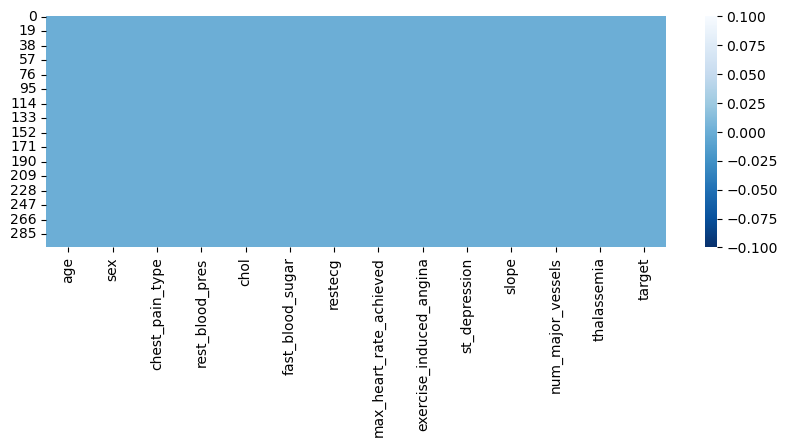

In [95]:
print(df.isna().sum())

plt.figure(figsize = (10,3))
sns.heatmap(df.isna(), cbar=True, cmap='Blues_r');

## Exploratory Data Analysis

### Univariate Analysis

In [96]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_blood_pres', 'chol',
       'fast_blood_sugar', 'restecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

I will check for outliers in certain columns

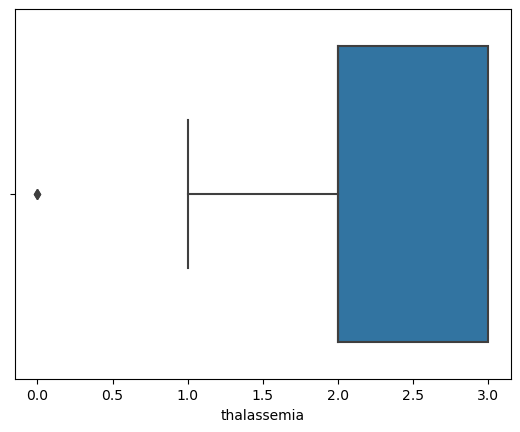

In [97]:
sns.boxplot(x=df['thalassemia']);

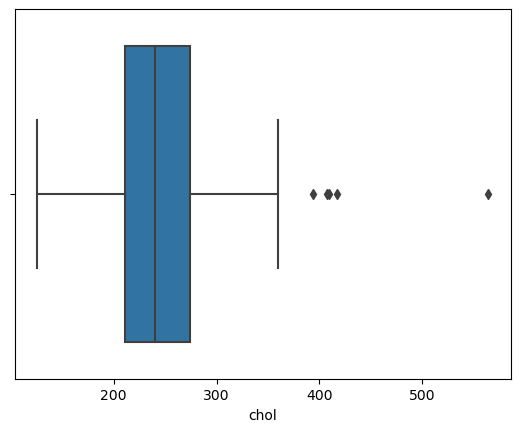

In [98]:
sns.boxplot(x=df['chol']);

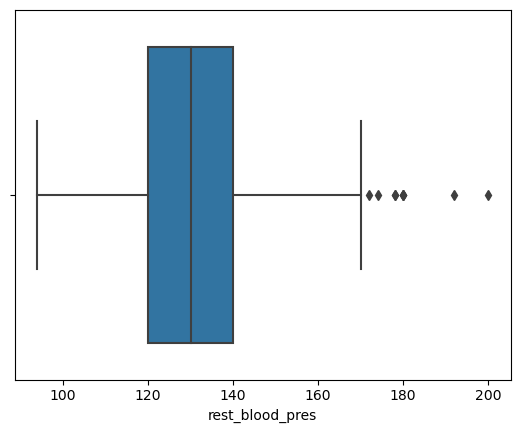

In [99]:
sns.boxplot(x=df['rest_blood_pres']);

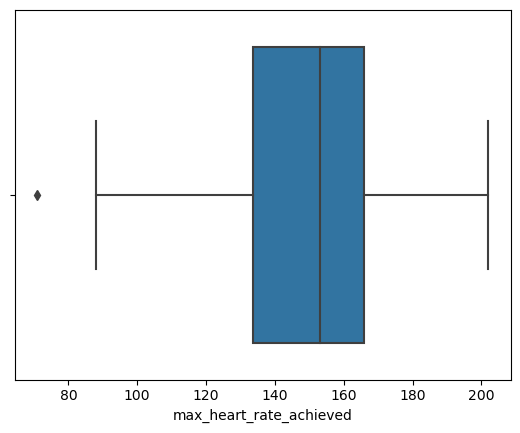

In [100]:
sns.boxplot(x=df['max_heart_rate_achieved']);

Some outliers have been observed in the thalassemia, cholesterol, resting blood pressure, & maximun heart rate achieved columns
> I will deal with them later on in the project

- Creating and investigating the age groups/categories of patients

In [101]:
def age_bracket(age):
    if age <= 35:
        return 'Youth (<=35)'
    elif age <= 55:
        return 'Adult (<=55)'
    elif age <= 65:
        return 'Old Adult (<= 65)'
    else:
        return 'Elderly (>65)'
    
df['age_bracket'] = df['age'].apply(age_bracket)
df.head(2)

,age,sex,chest_pain_type,rest_blood_pres,chol,fast_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target,age_bracket
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<= 65)
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55)


Next, I will investigate the age group of patients

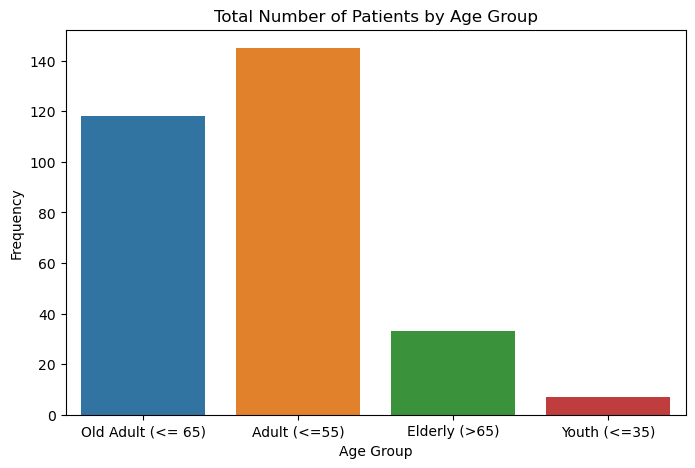

In [102]:
plt.figure(figsize = (8,5))
sns.countplot(x = df['age_bracket'])
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Total Number of Patients by Age Group');

Majority of the patients are less than/equal to 55years (36 - 55 years old), followed by Old Adults (56 - 65 years old)

- Next, I will investigate the sex/gender of patients

In [103]:
def gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'
    
df['gender'] = df['sex'].apply(gender)
df.head(2)

,age,sex,chest_pain_type,rest_blood_pres,chol,fast_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<= 65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55),Male


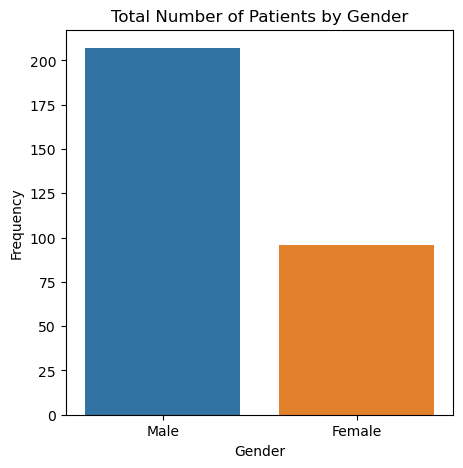

In [104]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['gender'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Total Number of Patients by Gender');

It can be seen that there are more males than females

In [105]:
df.head(1)

,age,sex,chest_pain_type,rest_blood_pres,chol,fast_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<= 65),Male


- Next, I will investigate the chest pain type

In [106]:
# chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)

def chest_pain(cp):
    if cp == 1:
        return 'typical angina'
    elif cp == 2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-anginal pain'
    else:
        return 'asymptomatic'
    
df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)
df.head(2)

,age,sex,chest_pain_type,rest_blood_pres,chol,fast_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<= 65),Male,non-anginal pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55),Male,atypical angina


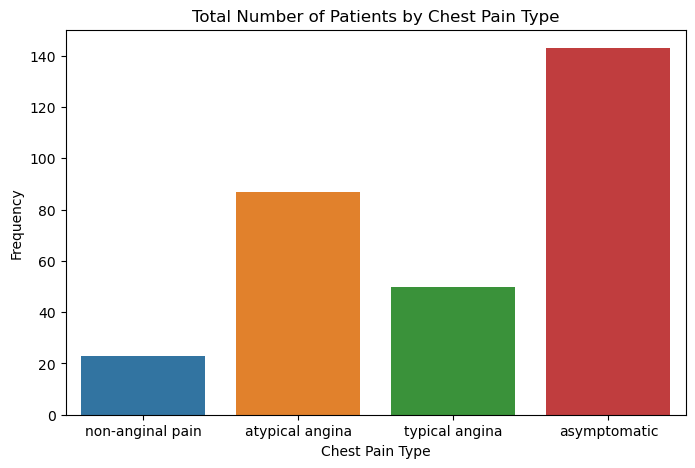

In [107]:
plt.figure(figsize = (8,5))
sns.countplot(x = df['cp_cat'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.title('Total Number of Patients by Chest Pain Type');

Majority of the patients are asymptomatic, followed by atypical angina. The least number of patients classify as having non-anginal pain.

- Next, I will investigate the Target

In [108]:
def label(tg):
    if tg == 1:
        return 'Yes'
    else:
        return 'No'
    
df['label'] = df['target'].apply(label)
df.head(2)

,age,sex,chest_pain_type,rest_blood_pres,chol,fast_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<= 65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55),Male,atypical angina,Yes


label
Yes    165
No     138
Name: count, dtype: int64


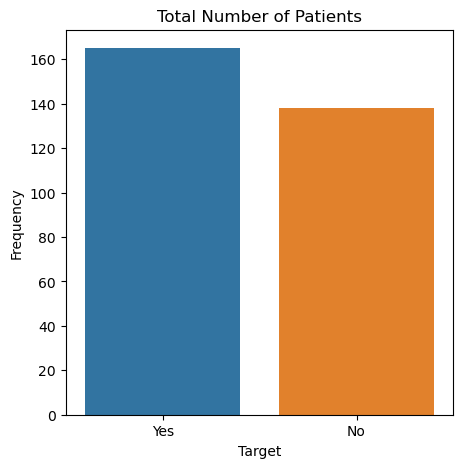

In [109]:
print(df['label'].value_counts())

plt.figure(figsize = (5,5))
sns.countplot(x = df['label'])
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Total Number of Patients');

Majority of the patients in the dataset have heart disease (165), while 138 do not have heart disease

### Bivariate Analysis

In [110]:
df.head()

,age,sex,chest_pain_type,rest_blood_pres,chol,fast_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<= 65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult (<= 65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult (<= 65),Female,asymptomatic,Yes


I will investigate the age group of patients by the target feature

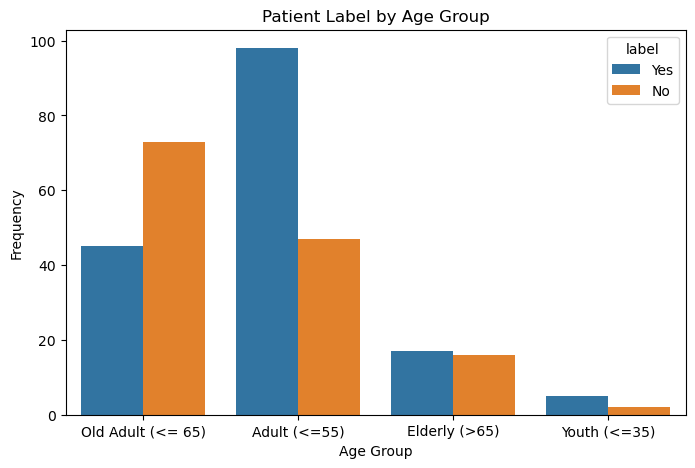

In [111]:
plt.figure(figsize = (8,5))
sns.countplot(x = df['age_bracket'], hue = df['label'])
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Patient Label by Age Group');

Majority of the patients who fall within the Adult age bracket (36-55 years old) are seen to have heart disease, followed by the old adult category (56-65 years old)

- Next, I will investigate the gender of patients by the target feature

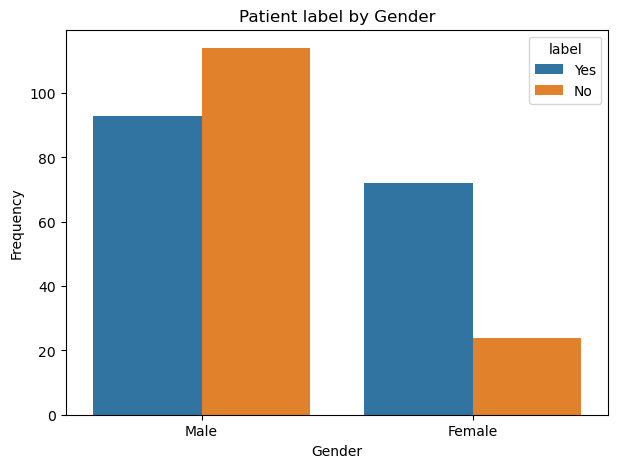

In [112]:
plt.figure(figsize = (7,5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Patient label by Gender');

In the male category, there are more patients _**without**_ heart disease, while in the female category, we have more patients ***with*** heart disease.

> Next, I will investigate the chest pain type of patients by the target feature

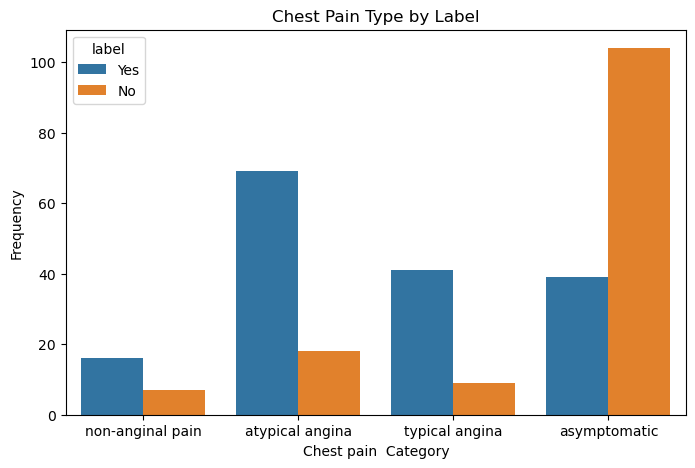

In [113]:
plt.figure(figsize = (8,5))
sns.countplot(x=df['cp_cat'], hue=df['label'])
plt.xlabel('Chest pain  Category')
plt.ylabel('Frequency')
plt.title('Chest Pain Type by Label');

Majority of asymptomatic patients do not have heart disease, while majority of the patients with atypical angina chest pain type have heart disease, followed by those with typical angina chest pain type.

### Multivariate Analysis

In [114]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_blood_pres', 'chol',
       'fast_blood_sugar', 'restecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'slope',
       'num_major_vessels', 'thalassemia', 'target', 'age_bracket', 'gender',
       'cp_cat', 'label'],
      dtype='object')

In [115]:
df2 = df.drop(['age_bracket', 'gender', 'cp_cat', 'label'], axis=1)
df2.head()

,age,sex,chest_pain_type,rest_blood_pres,chol,fast_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


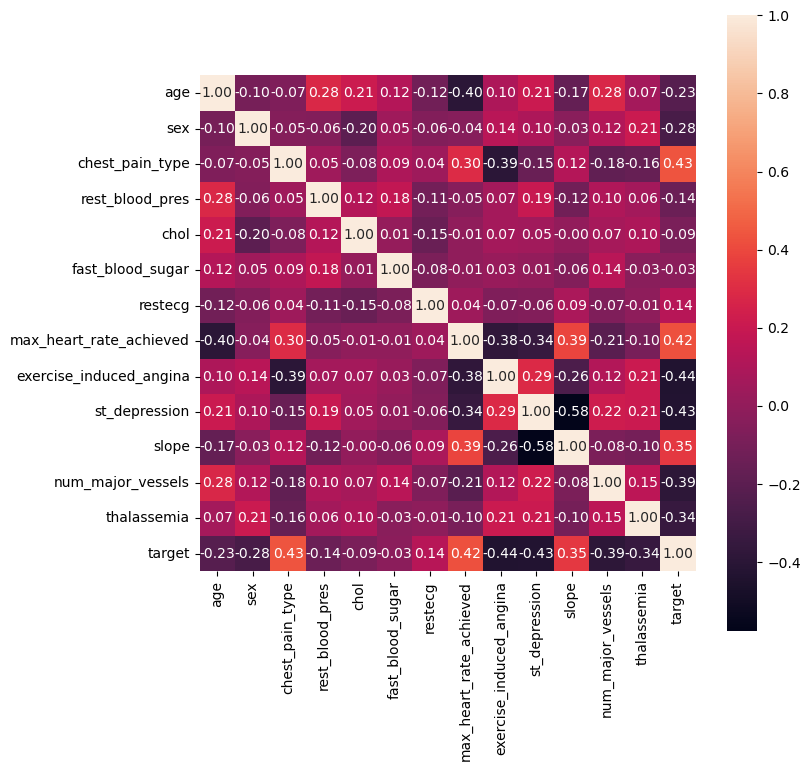

In [116]:
plt.figure(figsize = (8,8))

hm = sns.heatmap(df2.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

Some variables are negatively correlated with **Target** and they include age, sex, resting blood pressure, cholesterol, fasting blood sugar, exercise induced angina, ST depression induced by exercise relative to rest, number of major vessels colored by fluoroscopy, and thalassemia. This suggests that there is a statistical relationship between the variable 'Target' and these other variables. 
> For example, the negative correlation between the "target" variable (presence or absence of heart disease) and the "gender" variable (male or female) indicates that within each gender category (male and female), the presence of heart disease (target=1) tends to be associated with the other gender (e.g., males with heart disease and females without heart disease, or vice versa). This relationship, however, is a weak negative relationship (r = -0.28). 
>
>Similarly, the negative correlation between the "target" variable and age categories suggests that within each age category, the presence of heart disease (target=1) tends to be associated with younger age groups. For example, it may indicate that individuals in the younger age categories (e.g., 36-55) are more likely to have heart disease, while individuals in the older age categories (e.g., 65+) are less likely to have heart disease. This relationship is also a weak negative relationship (r = -0.23).

## Feature Engineering/Data Pre-processing

In [117]:
df.head()

,age,sex,chest_pain_type,rest_blood_pres,chol,fast_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<= 65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult (<= 65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult (<= 65),Female,asymptomatic,Yes


Next, I create a copy of my DataFrame ___excluding___ the target/label variable along other columns created.

In [118]:
df1 = df[['age', 'sex', 'chest_pain_type', 'rest_blood_pres', 'chol', 'fast_blood_sugar', 'restecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'slope', 'num_major_vessels', 'thalassemia']]
df1.head(2)

,age,sex,chest_pain_type,rest_blood_pres,chol,fast_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [119]:
label = df[['target']]
label.head()

,target
0,1
1,1
2,1
3,1
4,1


Next, I will investigate the data types

In [120]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
rest_blood_pres              int64
chol                         int64
fast_blood_sugar             int64
restecg                      int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
slope                        int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

Next, I will deal with the outliers found in the columns: 'rest_blood_pres', 'chol', 'thalassemia', 'max_heart_rate_achieved' \
_By **Normalizing** the data_

In [121]:
scaler = MinMaxScaler()

df1['Scaled_RBP'] = scaler.fit_transform(df1['rest_blood_pres'].values.reshape(-1, 1))
df1['Scaled_chol'] = scaler.fit_transform(df1['chol'].values.reshape(-1, 1))
df1['Scaled_thal'] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1, 1))
df1['Scaled_MHRA'] = scaler.fit_transform(df['max_heart_rate_achieved'].values.reshape(-1, 1))

df1.drop(['rest_blood_pres', 'chol', 'thalassemia', 'max_heart_rate_achieved'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fast_blood_sugar,restecg,exercise_induced_angina,st_depression,slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_MHRA
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


## Machine Learning

Next, I will split the dataset into training and testing sets (X = Questions; y = Answers)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

> ***Model Building using Logistic Regression***

In [131]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-score: 0.875
AUC-ROC: 0.8685344827586206


**Accuracy:** The accuracy of the model is approximately 0.869, which means that it correctly predicts the class (presence or absence of heart disease) for about 86.9% of the cases in the dataset. 

**Precision:** The precision score is 0.875, indicating that when the model predicts the positive class (presence of heart disease), it is correct 87.5% of the time. This metric highlights the model's ability to avoid false positives, which is crucial in scenarios where false alarms can be costly.

**Recall:** The recall score is also 0.875, implying that the model identifies 87.5% of the actual positive cases (heart disease) correctly. Recall is essential when it is vital to capture as many positive cases as possible, such as in medical diagnoses.

**F1-Score:** The F1-score, which is the harmonic mean of precision and recall, is 0.875. It provides a balanced measure of a model's performance, considering both false positives and false negatives. An F1-score of 0.875 indicates a good balance between precision and recall.

**AUC-ROC:** The area under the receiver operating characteristic curve (AUC-ROC) is approximately 0.869. This metric assesses the model's ability to distinguish between the two classes (heart disease and no heart disease) across different probability thresholds. An AUC-ROC score close to 1 indicates a strong discriminatory power of the model.

> Next, I will create a Confusion Matrix

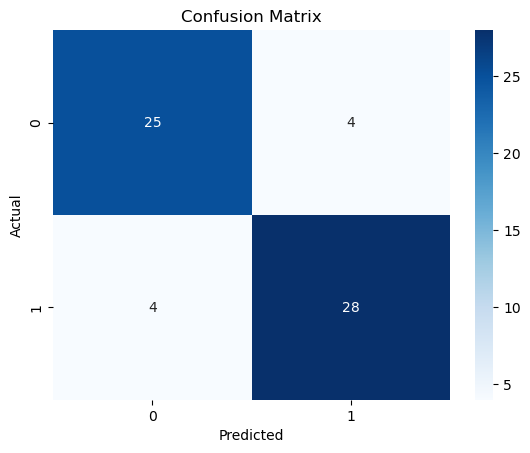

In [132]:
lcm = confusion_matrix(y_test, ly_pred)

sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**True Positives (TP): 28**\
These are cases where the model correctly predicted the positive class. This means that the model correctly identified 28 instances as "positive" (having heart disease), and these predictions were accurate.

**False Positives (FP): 4**\
These are cases where the model incorrectly predicted the positive class. In other words, the model made 4 predictions as "positive" (having heart disease) when they were actually "negative" (did not have heart disease).

**True Negatives (TN): 25**\
These are cases where the model correctly predicted the negative class. The model accurately identified 25 instances as "negative" (not having heart disease).

**False Negatives (FN): 4**\
These are cases where the model incorrectly predicted the negative class. The model made 4 predictions as "negative" (not having heart disease) when they were actually "positive" (having heart disease).

> Next, I will try another model

***Model Building using Random Forest Classifier***

In [154]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision:', precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, rfy_pred))
print('F1-score:', f1_score(y_test, rfy_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1-score: 0.84375
AUC-ROC: 0.8356681034482758


**Accuracy (0.8361):** 
This model correctly predicts around 83.61% of all cases.

**Precision (0.8438):**
Out of all positive predictions made by the model, 84.38% are correct.

**Recall (0.8438):**
The model captures 84.38% of all actual positive cases.

**F1-score (0.8438):**
This is the harmonic mean of precision and recall, providing a balance between the two. It's also 84.38%.

**AUC-ROC (0.8357):**
The Area Under the ROC Curve is a measure of the model's ability to distinguish between classes, approximately 0.8357.

> In terms of accuracy, precision, recall, and F1-score, the Logistic Regression model slightly outperforms the Random Forest Classifier. It has higher values in each of these metrics.
>
>However, the differences between the two models are relatively small, indicating that both models are quite similar in their ability to make accurate predictions.
>
>The AUC-ROC scores for both models are also close, further supporting the notion that they perform comparably in distinguishing between classes.

In summary, both models demonstrate strong classification capabilities and yield similar results but the Logistic Regression model has a slight edge in performance in this specific scenario.

- Next, I will create a confusion matrix

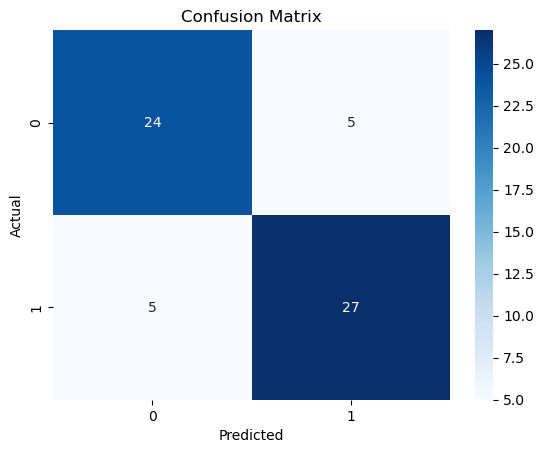

In [155]:
rcm = confusion_matrix(y_test, rfy_pred)

sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**True Positives (TP):** There are 27 instances where the model correctly predicted the positive class (e.g., correctly identifying individuals with heart disease).

**False Positives (FP):** The model predicted the positive class incorrectly in 5 cases, where the actual class was negative (e.g., incorrectly identifying individuals as having heart disease when they do not).

**True Negatives (TN):** There are 24 instances where the model correctly predicted the negative class (e.g., correctly identifying individuals without heart disease).

**False Negatives (FN):** The model predicted the negative class incorrectly in 5 cases, where the actual class was positive (e.g., incorrectly identifying individuals as not having heart disease when they do).

> Again, from the Confsion Matrix, the Logistic Regression model slightly outperforms the Random Forest Classifier.

***Next, I will apply different (Eight) Machine Learning Algorithms to the dataset***

In [179]:
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [180]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score (y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [181]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,83.61%,75.41%,88.52%,65.57%,86.89%,85.25%,86.89%


In [182]:
print('Precision')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,83.61%,75.41%,88.52%,65.57%,86.89%,85.25%,86.89%


In [183]:
print('Recall')
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,83.61%,75.41%,88.52%,65.57%,86.89%,85.25%,86.89%


In [184]:
print('ROC Score')
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,83.61%,75.41%,88.52%,65.57%,86.89%,85.25%,86.89%


SGD Classifier and Logistic Regression:
Both the SGD Classifier and Logistic Regression models performed exceptionally well in terms of accuracy, precision, recall, and ROC score, all around 88.52%. This indicates that they correctly predicted the target variable in approximately 88.52% of cases.
These models are well-balanced, suitable for scenarios where both false positives and false negatives need to be minimized.

Naive Bayes:
The Naive Bayes classifier performed well with an accuracy of 86.89%, almost matching the performance of the SGD and Logistic Regression models. Naive Bayes is a probabilistic model that works well for various types of data, including text data.

Decision Tree:
The Decision Tree classifier achieved an accuracy of 85.25%. While slightly below the top performers, it is a strong model.
Decision Trees are interpretable and can be useful when understanding the reasons behind predictions is crucial.

Random Forest:
The Random Forest classifier demonstrated solid performance with an accuracy of 83.61%. It maintained a good balance between precision and recall, indicating that it's a robust model. Random Forest is known for handling complex relationships in data and is less prone to overfitting.

K-Nearest Neighbors:
The K-Nearest Neighbors classifier had an accuracy of 75.41%, which scored considerably lower than the tested models. This suggests that the model might not be the best choice for this dataset, and it might require further tuning or feature engineering.

SVC (Support Vector Classifier):
The SVC had the lowest accuracy at 65.57% among the models tested. This indicates that the SVC struggled to fit the data well, and it might not be the best choice for this particular dataset without further optimization.

> In conclusion, the **SGD Classifier and Logistic Regression** had identical scores, and as such are strong contenders for this dataset, offering a good balance between precision and recall. The Random Forest and Naive Bayes models also performed well and could be considered, depending on specific requirements. The Decision Tree model falls in between, offering a balance between interpretability and performance. On the other hand, K-Nearest Neighbors and SVC may require further optimization or might not be well-suited for this dataset.